In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
bankdata = pd.read_csv("data.csv")

In [7]:
bankdata.shape

(1000, 28)

In [8]:
bankdata.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00000.wav,0.349943,1.935690,1784.420446,2002.650192,3806.485316,0.083066,-113.596742,121.557302,-19.158825,...,8.810668,-3.667367,5.751690,-5.162761,0.750947,-1.691937,-0.409954,-2.300208,1.219928,blues
1,blues.00001.wav,0.340983,-0.058070,1529.835316,2038.617579,3548.820207,0.056044,-207.556796,124.006717,8.930562,...,5.376802,-2.239119,4.216963,-6.012273,0.936109,-0.716537,0.293875,-0.287431,0.531573,blues
2,blues.00002.wav,0.363603,1.033480,1552.481958,1747.165985,3040.514948,0.076301,-90.754394,140.459907,-29.109965,...,5.789265,-8.905224,-1.083720,-9.218359,2.455805,-7.726901,-1.815724,-3.433434,-2.226821,blues
3,blues.00003.wav,0.404779,0.078957,1070.119953,1596.333948,2185.028454,0.033309,-199.431144,150.099218,5.647594,...,6.087676,-2.476420,-1.073890,-2.874777,0.780976,-3.316932,0.637981,-0.619690,-3.408233,blues
4,blues.00004.wav,0.308590,-8.457873,1835.494603,1748.362448,3580.945013,0.101500,-160.266031,126.198800,-35.605448,...,-2.806385,-6.934122,-7.558619,-9.173552,-4.512166,-5.453538,-0.924162,-4.409333,-11.703781,blues


In [9]:
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
bankdata['label']= label_encoder.fit_transform(bankdata['label']) 
bankdata['filename']=label_encoder.fit_transform(bankdata['filename'])  
bankdata['label'].unique() 
#bankdata['filename'].unique() 

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [10]:
X = bankdata.drop('label', axis=1)
y = bankdata['label']

In [11]:
X.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,0,0.349943,1.935690,1784.420446,2002.650192,3806.485316,0.083066,-113.596742,121.557302,-19.158825,...,-8.324323,8.810668,-3.667367,5.751690,-5.162761,0.750947,-1.691937,-0.409954,-2.300208,1.219928
1,1,0.340983,-0.058070,1529.835316,2038.617579,3548.820207,0.056044,-207.556796,124.006717,8.930562,...,-5.560387,5.376802,-2.239119,4.216963,-6.012273,0.936109,-0.716537,0.293875,-0.287431,0.531573
2,2,0.363603,1.033480,1552.481958,1747.165985,3040.514948,0.076301,-90.754394,140.459907,-29.109965,...,-13.123111,5.789265,-8.905224,-1.083720,-9.218359,2.455805,-7.726901,-1.815724,-3.433434,-2.226821
3,3,0.404779,0.078957,1070.119953,1596.333948,2185.028454,0.033309,-199.431144,150.099218,5.647594,...,-3.196314,6.087676,-2.476420,-1.073890,-2.874777,0.780976,-3.316932,0.637981,-0.619690,-3.408233
4,4,0.308590,-8.457873,1835.494603,1748.362448,3580.945013,0.101500,-160.266031,126.198800,-35.605448,...,-13.083820,-2.806385,-6.934122,-7.558619,-9.173552,-4.512166,-5.453538,-0.924162,-4.409333,-11.703781


In [12]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int32

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [14]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [15]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.91


In [16]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[22  0  0  0  0  0  0  0  0  0]
 [ 1 13  2  0  0  0  0  0  0  0]
 [ 0  0 20  3  0  0  0  0  0  0]
 [ 0  0  1 21  0  0  0  0  0  0]
 [ 0  0  0  0 15  1  0  0  0  0]
 [ 0  0  0  0  1 16  0  1  0  0]
 [ 0  0  0  0  1  0 19  0  1  0]
 [ 0  0  0  0  0  0  0 22  2  0]
 [ 0  0  0  0  0  0  0  3 18  0]
 [ 0  0  0  0  0  0  0  0  1 16]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       1.00      0.81      0.90        16
           2       0.87      0.87      0.87        23
           3       0.88      0.95      0.91        22
           4       0.88      0.94      0.91        16
           5       0.94      0.89      0.91        18
           6       1.00      0.90      0.95        21
           7       0.85      0.92      0.88        24
           8       0.82      0.86      0.84        21
           9       1.00      0.94      0.97        17

    accuracy                           0.91       200
   macro avg       

In [17]:
confmat = confusion_matrix(y_test,y_pred)
print(confmat)

[[22  0  0  0  0  0  0  0  0  0]
 [ 1 13  2  0  0  0  0  0  0  0]
 [ 0  0 20  3  0  0  0  0  0  0]
 [ 0  0  1 21  0  0  0  0  0  0]
 [ 0  0  0  0 15  1  0  0  0  0]
 [ 0  0  0  0  1 16  0  1  0  0]
 [ 0  0  0  0  1  0 19  0  1  0]
 [ 0  0  0  0  0  0  0 22  2  0]
 [ 0  0  0  0  0  0  0  3 18  0]
 [ 0  0  0  0  0  0  0  0  1 16]]


(10.0, 0.0)

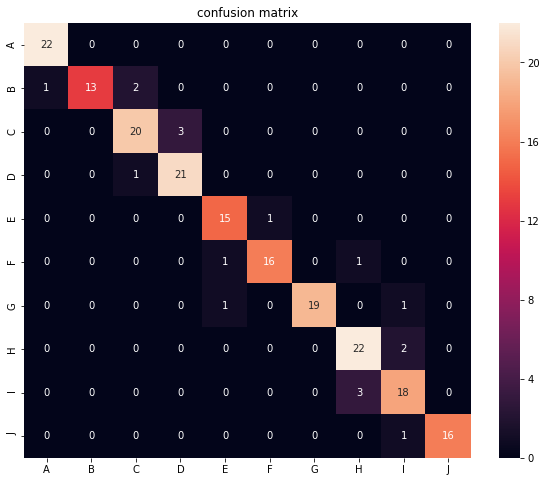

In [18]:
import numpy as np
from numpy import linalg as LA 
import seaborn as sn

df_cm = pd.DataFrame(confmat , index = [i for i in "ABCDEFGHIJ"] , columns = [i for i in "ABCDEFGHIJ"])
plt.figure(figsize = (10,8))
plt.title('confusion matrix')
ax = sn.heatmap(df_cm, annot= True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)